This is a small project I did as part of the IBM Data Analyst Professional Certificate. The objective is to predict housing prices based on housing data from the US. Contents:
* Part 1: Importing Data Sets
* Part 2: Data Wrangling
* Part 3: Exploratory Data Analysis
* Part 4: Model Development
* Part 5: Model Refinement
* Part 6: Predictions

This dataset contains house sale prices for King County, USA, which includes Seattle. It includes homes sold between May 2014 and May 2015.


| Variable|  Description |
|---|---|
|id|A notation for a house|
|date|Date house was sold|
|price| Price is prediction target|
|bedrooms| Number of bedrooms|
|bathrooms| Number of bathrooms|
|sqft_living| Square footage of the home|
|sqft_lot| Square footage of the lot|
|floors| Total floors (levels) in house|
|waterfront|House which has a view to a waterfront|
|view|Has been viewed|
|condition|How good the condition is overall|
|grade|overall grade given to the housing unit, based on King County grading system|
|sqft_above|Square footage of house apart from basement|
|sqft_basement|Square footage of the basement|
|yr_built|Built Year|
|yr_renovated|Year when house was renovated|
|zipcode| Zip code|
|lat|Latitude coordinate|
|long| Longitude coordinate|
|sqft_living15|Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area|
|sqft_lot15|LotSize area in 2015(implies-- some renovations)|


Importing libraries:


In [152]:
!pip install mplcursors

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import mplcursors
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline # Lets you streamline essential model development processes.
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Part 1: Importing Data Sets

In [154]:
file_name='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df=pd.read_csv(file_name)

In [155]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


What are the data types?

In [156]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Statistical summary.

In [157]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Part 2: Data Wrangling


Dropping unneeded columns.

In [158]:
df.drop(['id', 'Unnamed: 0'], axis=1, inplace=True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


We can see we have missing values for the columns <code>bedrooms</code> and <code>bathrooms </code>


In [159]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())


number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


Replacing nan values with the mean of <code>'bedrooms'</code> and <code>'bathrooms'</code> .

In [160]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

In [161]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [162]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


# Part 3: Exploratory Data Analysis

Number of houses with unique floor values.


In [163]:
unique_floors = df['floors'].value_counts().to_frame()
unique_floors

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


A cursory search revealed that some houses do indeed have these odd 0.5 floor conventions. For instance, a 1.5 story house is just a 2 story house with all the primary living spaces on the ground floor, with guest rooms and storage on the first floor. 

I wonder what effect this might have on price?

Text(0, 0.5, 'Avg. price (millions USD)')

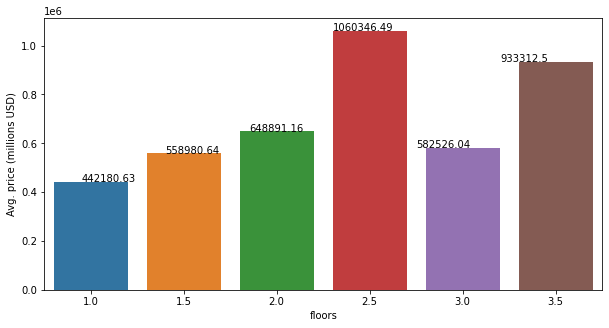

In [164]:
cal = [1.8, 1.9] # Calibrates my hacky value labels.
floor_df = df.groupby(['floors'])['price'].mean().to_frame().reset_index()
plt.figure(figsize=[10, 5])
floorplot = sns.barplot(x=floor_df['floors'], y=floor_df['price'])
for index, row in floor_df.iterrows():
    floorplot.text((row.floors * cal[0]) - cal[1], row.price, round(row.price, 2), color='black')
floorplot.set_ylabel('Avg. price (millions USD)')

Price outliers among houses without a waterfront view vs those with.


[Text(0, 0, 'Non-waterfront'), Text(1, 0, 'Waterfront')]

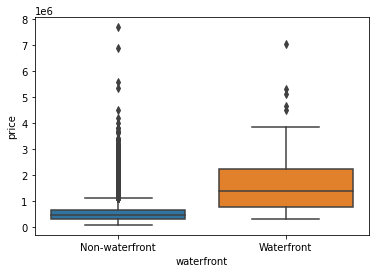

In [165]:
waterbox = sns.boxplot(x=df['waterfront'], y=df['price'], data=df)
waterbox.set_xticklabels(['Non-waterfront', 'Waterfront'])

Is <code>sqft_above</code> negatively or positively correlated with price?


<AxesSubplot:xlabel='sqft_above', ylabel='price'>

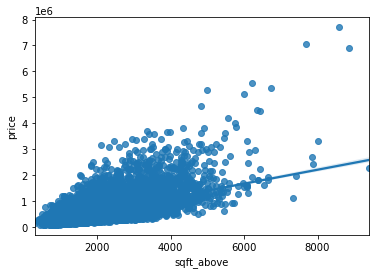

In [166]:
sns.regplot(x=df['sqft_above'], y=df['price'], data=df)

Which features are most correlated with price?
.corr() uses Pearson correlation by default.

In [167]:
df.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

It's possible there's also a high degree of multicollinearity between many explanatory variables in this dataset. Better check, as it may influence which techniques we use to model this later.

In [168]:
df.corr()[['sqft_living', 'bathrooms']].sort_values(by='sqft_living')

,sqft_living,bathrooms
zipcode,-0.199430,-0.204819
condition,-0.058753,-0.126197
lat,0.052529,0.024246
yr_renovated,0.055363,0.050560
waterfront,0.103818,0.063744
sqft_lot,0.172826,0.087929
sqft_lot15,0.183286,0.087539
long,0.240223,0.224922
view,0.284611,0.188341
yr_built,0.318049,0.506913


Glad we checked! This will be useful later.

# Part 4: Model Development

We've got a few winners reasonably correlated with price.

In [169]:
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", 
            "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]

In [170]:
x = df[features]
y = df['price']
lm = LinearRegression()
lm.fit(x, y)
lm.score(x, y) # Output = R^2

0.6576951666037504

While not a bad initial result, this model's accuracy can be improved with two main additions.
1. Standardisation. StandardScaler() removes the mean from each feature then scales to unit variance. 
2. Using polynomial feature transformation to expose relationships between variables. PolynomialFeatures() does the job by creating new features by raising existing ones by an exponent. It's important to apply this before normalising the data, otherwise the polynomial features will be way out of proportion with the others. That's not necessarily a problem for this project, but it's generally bad practice, as it can lead to aberrant behaviour.

In [171]:
Input = [('polynomial', PolynomialFeatures(include_bias=False)),
         ('scale', StandardScaler()),
         ('model', LinearRegression())]

This list of tuples is a requirement for building our pipeline, which will perform each transformation.

In [172]:
pipe = Pipeline(Input)
pipe.fit(x, y)
pipe.score(x, y)

0.7513409006690349

Much better!

# Part 5: Model Evaluation and Refinement

While this R^2 is pretty good, that's because it's predicated on exactly the dataset we gave it. If we threw it into the wilderness with nothing but a tinderbox and a different set of housing data, it wouldn't do nearly as well. Time to split the data into training and test sets to better assess the model's predictive capabilites. 


In [173]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [174]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 7565
number of training samples: 14048


Ridge regression is an ideal regularisation method when your model has a high degree of multicollinearity. We know from our exploration this is the case. We use <code>alpha</code> to control the weighting of each variable.

In [175]:
from sklearn.linear_model import Ridge

In [176]:
rr = Ridge(alpha=0.1)
rr.fit(x_train, y_train)
rr.score(x_test, y_test)

0.6532982102169689

Now that we have our ridge model, let's throw it into a pipe and see how good our model can get.

In [191]:
Input = [('polynomial', PolynomialFeatures(degree=2, include_bias=False, order='F')), 
         ('scale', StandardScaler()),
         ('model', Ridge(alpha=0.1))]
pipe = Pipeline(Input)
model = pipe.fit(x_train, y_train)
model.score(x_test, y_test)

0.7433792231315717

We can use k-fold cross-validation to split our data into 'folds', or partitions, where every element of the data is split into k random configurations of train/ test sets, such that each datapoint is eventually used as both a training and test point.

In [178]:
f = 10
cv = cross_val_score(model, x, y, cv=f, scoring='r2')
print(f'This model has an average R^2 of {round(cv.mean(), 2)} from {f} folds, with a standard deviation of {round(cv.std(), 2)}.')
print(cv)

This model has an average R^2 of 0.72 from 10 folds, with a standard deviation of 0.03.
[0.75118605 0.74716599 0.71843604 0.75211592 0.72229052 0.67977278
 0.7057093  0.64523422 0.74980682 0.71077263]


# Part 6: Predictions

It's possible to get extra performance out of this model by, for instance, separating categorical values from the feature list to avoid them being normalised, but for the sake of curiosity (and time!) I'd like to see some predictions.

We first need to retrain the model on *all* available data, have it make pricing predictions on each datapoint, then plot those predictions against the real price.

(0.0, 2000000.0)

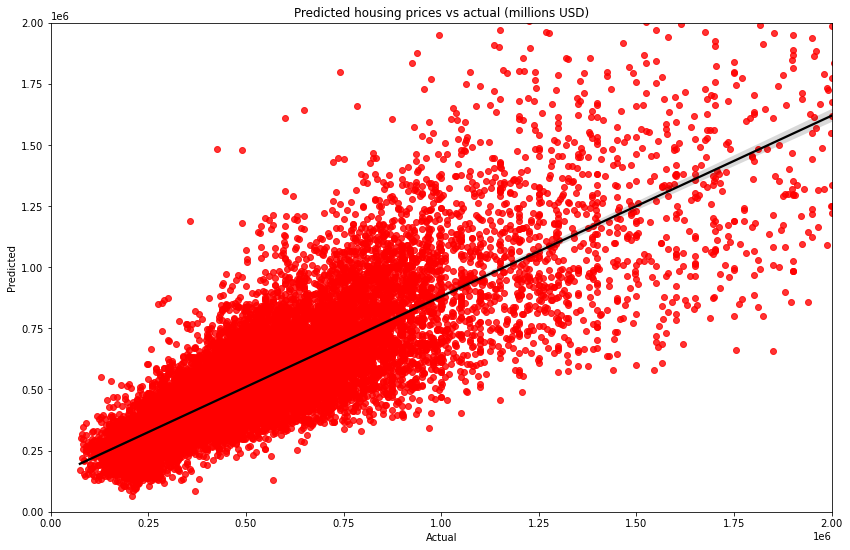

In [195]:
fmodel = pipe.fit(x, y)
y_pred = fmodel.predict(x)

prange = (0, 2000000)
plt.figure(figsize=[14, 9])
sns.regplot(y=y_pred, x=y, color='red', line_kws={'color':'black'})
plt.title('Predicted housing prices vs actual (millions USD)')
plt.ylabel('Predicted')
plt.xlabel('Actual')
mplcursors.cursor(hover=True)
plt.ylim(prange)
plt.xlim(prange)

There you have it! A 72% accurate predictor of housing prices. Clearly other factors are at play when it comes to pricing higher-end housing, but it's a fairly decent first pass. Learned a whole lot working through this.